<a href="https://colab.research.google.com/github/LeVuPhuoc/AI-Robotics/blob/main/cifar100_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. import thư viện

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
import cv2
import pickle

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.linear_model import Perceptron
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100

# 2. Lấy data 

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar100.load_data() #lay du lieu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255.0
x_test/=255.0
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
y_train.shape

169017344/169001437 [==============================] - 6s 0us/step


(50000, 100)

# 3. Tạo mô hình và train

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(32,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dense(100,activation = 'softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 128)        

In [7]:
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs= 50,batch_size=64,validation_data=(x_test,y_test),verbose=1) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
782/782 [==============================] - 26s 20ms/step - loss: 4.3238 - accuracy: 0.0418 - val_loss: 3.9484 - val_accuracy: 0.0900
Epoch 2/50
782/782 [==============================] - 15s 19ms/step - loss: 3.6965 - accuracy: 0.1266 - val_loss: 3.4865 - val_accuracy: 0.1619
Epoch 3/50
782/782 [==============================] - 15s 19ms/step - loss: 3.3236 - accuracy: 0.1879 - val_loss: 3.1780 - val_accuracy: 0.2213
Epoch 4/50
782/782 [==============================] - 15s 19ms/step - loss: 3.0579 - accuracy: 0.2360 - val_loss: 2.9805 - val_accuracy: 0.2533
Epoch 5/50
782/782 [==============================] - 15s 20ms/step - loss: 2.8426 - accuracy: 0.2768 - val_loss: 2.8062 - val_accuracy: 0.2828
Epoch 6/50
782/782 [==============================] - 15s 19ms/step - loss: 2.6593 - accuracy: 0.3123 - val_loss: 2.8013 - val_accuracy: 0.2907
Epoch 7/50
782/782 [==============================] - 15s 19ms/step - loss: 2.5087 - accuracy: 0.3427 - val_loss: 2.7040 - val_accuracy:

In [8]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 3.5231 - accuracy: 0.3350
Test score: 3.52312970161438
Test accuracy: 0.33500000834465027


# 4. Vẽ đồ thị

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


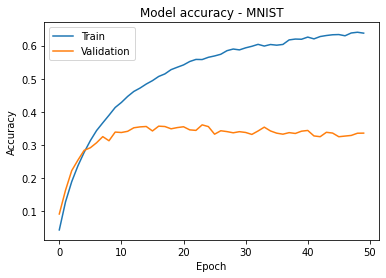

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy - MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()